<a href="https://colab.research.google.com/github/mateusbehrend/Lab2-PR/blob/master/Copy_of_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

In Lab 2, we will be coding Linear and Logistic regression using only Numpy! You will also be asked to use what you know about gradient descent to tweak the algorithms for better results. While teams should collaborate and help each other, each member of a group should complete their own code.

This skeleton is intended to be somewhat sparse in order to give you the opportunity to become familiar with the intuition behind gradient descent and to make you very familiar with Numpy. Please reach out to us for any conceptual/mathematical questions or if you are stuck on something and need a hint - we don't want you spending hours on this!

If you are unfamiliar with Numpy, don't worry! There are a ton of great resources on it and the its documentation is very well-written (*cough cough* OpenCV). You can figure our how to do most things with a simple Google Search, but here are some functions, operators, etc. that I found useful in this lab:

    .dot() and @, .astype(), .T, unique(), mean(), sum(), inv(), pinv(), reshape(), vstack(), hstack(), .unique(), .concatenate(), .shape(), .any()

### Some notes on using Colab

If you've never used Colab before, this section is for you! Some things to note:

* The different boxes in this document are segments of Python code. Many of them contain errors and won't work if you try to run them right away (using the play button on the left). You need to fill in the blanks to make them work!

* If you update a block of code, even if you re-run it, you must also re-run all the blocks after it up to the point where you're currently working. They don't run themselves!

In [2]:
import numpy as np
import csv
from numpy.core.memmap import dtype
import matplotlib.pyplot as plt

# You may use these sklearn tools in your implementation, but no others.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
WEATHER_PATH = '/content/drive/MyDrive/weatherHistory.csv'
data = np.loadtxt(WEATHER_PATH, delimiter=",", dtype=str)
data = data[:,1:-1]
header = data[0]
data = data[1:]
data

array([['Partly Cloudy', 'rain', '9.472222222222221', ...,
        '15.826300000000002', '0.0', '1015.13'],
       ['Partly Cloudy', 'rain', '9.355555555555558', ...,
        '15.826300000000002', '0.0', '1015.63'],
       ['Mostly Cloudy', 'rain', '9.377777777777778', ..., '14.9569',
        '0.0', '1015.94'],
       ...,
       ['Partly Cloudy', 'rain', '22.03888888888889', ..., '16.1', '0.0',
        '1015.66'],
       ['Partly Cloudy', 'rain', '21.522222222222222', ..., '16.1',
        '0.0', '1015.95'],
       ['Partly Cloudy', 'rain', '20.438888888888894', ...,
        '15.520400000000002', '0.0', '1016.16']], dtype='<U125')

##Part 1: Single line fit!

In this part of the lab, you will be using only the humidity data to estimate the temperature using linear regression. Then we well compare the results of a single feature linear regression with the closed form solution. Experiment with the learning rate and number of iterations and try to find the optimal learning rate for 40 iterations (we got it to 59.5).

In [5]:
# Right now, the data is in one large matrix. Seperate out x as the humidity
# and y as the temperature.

x = data[:,4]
y = data[:,2]
x = x.astype('float')
y = y.astype('float')
print(x)
print(y)

[0.89 0.86 0.89 ... 0.56 0.6  0.61]
[ 9.47222222  9.35555556  9.37777778 ... 22.03888889 21.52222222
 20.43888889]


In [6]:
# Code the mean squared error function given x, y, a, and b.
def MSE(x, y, a, b):
  y_pred = a * x + b
  y_squared = (y- y_pred) ** 2
  mse = np.mean(y_squared)
  return mse

# Code the gradient descent function. This will return the new values of a and b
# after the gradient has been calculated and the learning rate has been applied.
def grad_des(x, y, a, b):
  a_delta = np.mean(-2*y*x + 2*a*(x**2)+2*x*b)
  b_delta = np.mean(-2*y + 2*a*x +2*b)
  return a_delta, b_delta


Final Training Loss: 59.50805538305633


Text(0.5, 1.0, 'single feature loss over time')

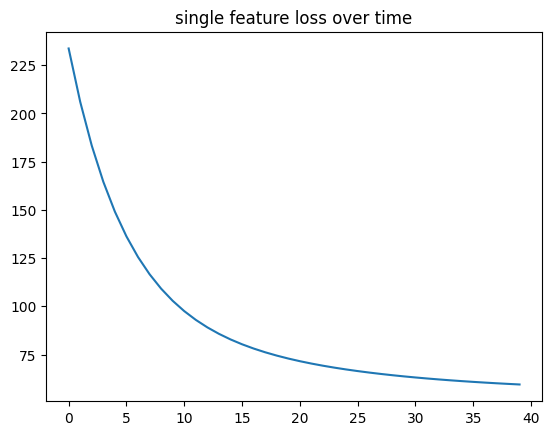

In [7]:
# Initialize a and b.
a = 0
b = 0
lr = 0.611

losses = []
for i in range(40):
  losses.append(MSE(x, y, a, b))
  # Update a and b using the values from your gradient descent function.
  a_change, b_change = grad_des(x, y, a, b)
  a  = a - lr * a_change
  b = b -lr * b_change

print(f"Final Training Loss: {losses[-1]}")
plt.plot(losses)
plt.title("single feature loss over time")

This is your **loss graph**. Hang onto it, because you'll need it later for the checkoff.

In addition, remember what we taught you guys about how your training should improve the loss: it should decay towards a minimum as the gradient descent iterations continue. Pay attention to the y-axis here, which indicates the loss. If your error blows up towards infinity or doesn't decrease very quickly, you should be able to recognize and rectify the issue with your hyperparameters!

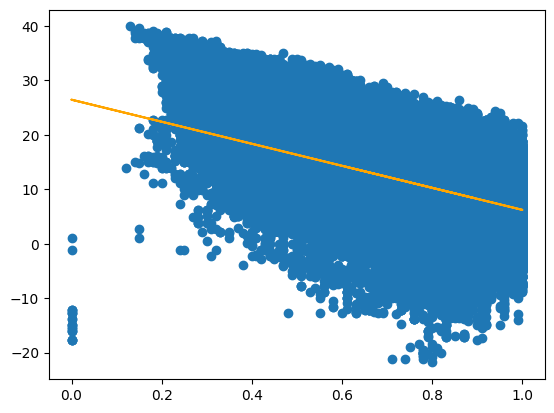

In [8]:
# Let's take a look at what our line of best fit looks like!
plt.scatter(x, y)
plt.plot(x, a*x+b, color='orange')

In [11]:
# Now let's find the true optimal solution using the closed form equation. Use
# np.polyfit or other such functions only to check your work.
# Don't forget what you need to add to the X matrix in order for the closed form
# to work!

X = np.zeros((len(x), 2))
X[:, 1] = 1
X[:, 0] = x
# print(X)
# print("Shape of X:", X.shape)

Y = y.reshape(-1, 1)
# print("Target vector Y:")
# print(Y)
# print("Shape of Y:", Y.shape)

th = np.linalg.inv(X.T @ X) @ X.T @ Y
# print(th)


a1, b1 = th

print(a1)
print(b1)

[-30.89438376]
[34.63692913]


Grad Desc:   a: -20.242910909005875 b: 26.453946045644404 MSE: 59.22299706661763
Closed form: a: [-30.89438376] b: [34.63692913] MSE: 54.761829807719856
Poly Fit:    a: -30.894383758051426 b: 34.63692912688962


Text(0.5, 1.0, 'closed and gd best fit lines')

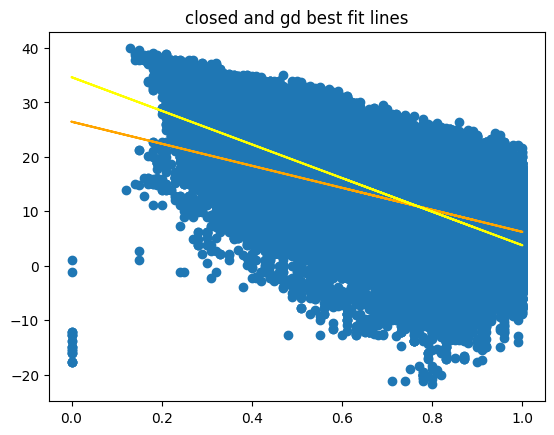

In [12]:
# Compare our closed form with our gradient descent. The closed form solution
# should be the same thing as the result of polyfit.

a2, b2 = np.polyfit(x, y, 1)
print(f"Grad Desc:   a: {a} b: {b} MSE: {MSE(x, y, a, b)}")
print(f"Closed form: a: {a1} b: {b1} MSE: {MSE(x, y, a1, b1)}")
print(f"Poly Fit:    a: {a2} b: {b2}")

plt.scatter(x, y)
plt.plot(x, a*x+b, color='orange')
plt.plot(x, a1*x+b1, color='yellow')
plt.title("closed and gd best fit lines")

To get checked off for this part, submit screenshots of the following in the submission form:
- loss graph
- the graph with your 2 best fit lines
- the final MSE for your gradient descent and closed form solutions
- your grad_des function

##Part 2: Multiple input features

In this part we will modify our gradient descent function to accept all of the possible input features. This will require converting the precipitation type and weather summaries to one-hot encodings (see slides 20-25 and 33). Then we will have to change our equations to be in matrix notation.

In [17]:
# First, lets get our x and y data one-hot encoded.
# hot_X should be the data where the categorical fields are converted into
#     one-hot encodings (temperature data excluded).
# As a sanity check, the dimensions should be (96453, 38).
# hot_y should still just be the temperature data.
print(data.shape)
hot_X = hot_X.astype(float)
hot_y = hot_y.astype(float)

(96453, 10)


NameError: name 'hot_X' is not defined

Now update your gradient descent and Mean Squared Error function to be able to learn from multiple features. See how low you can get the error after 40 iterations.

You may notice a higher error than we got in part 1, especially when compared with an extrememly low closed form error. Think about why this may be the case and what hyperparameters you can tune to improve this.

In [ ]:
def grad_des2(X, y, theta):
  #Code!
  return dt

def MSE2(x, y, theta):
  #Code!
  return error

In [ ]:
lr = #set learning rate

theta = np.zeros((len(hot_X[0]), 1))

losses = []
losses.append(MSE2(hot_X, hot_y, theta))

for i in range(40):
  losses.append(MSE2(hot_X, hot_y, theta))


print(f"Final Training Loss: {losses[-1]}")
plt.plot(losses)
plt.title("Multi feature loss over time")

In [ ]:
# Now solve for theta using the closed form and compare your final training loss between
# the closed form and regression solution

th2 = #find theta using closed form
MSE2(hot_X, hot_y, th2)

As you can (probably) see, the gradient descent error is worse than the single input version and much worse than the closed form solution. Think about why this is and how can improve it (hint: we talked about this technique in our lecture). Copy your code above into the cell below to make any modifications to improve your gradient descent!

In [ ]:
lr = #set learning rate

theta = np.zeros((len(hot_X[0]), 1))

losses = []
losses.append(MSE2(hot_X, hot_y, theta))

for i in range(40):
  losses.append(MSE2(hot_X, hot_y, theta))


print(f"Final Training Loss: {losses[-1]}")
plt.plot(losses)
plt.title("Modified multi feature loss over time")

To get checked off for this part, submit screenshots of the following in the submission form:
- both of your loss graphs
- closed form error
- your code for both GD algorithms
- an explaination of what you changed and why


##Part 3: Logistic Regression and K-fold Cross Validation

In this part of the lab you will be esimating if someone will suffer a heart attack in the next 10 years based on health statistics. This time, we will be using K-fold cross validation to determine the viability of our model. In lecture, we did not give you the full equation for logistic regression, I suggest deriving it before starting that part of the lab. Try to do it yourself! (The answer should be **simple** - if you are coding a disgusting equation, that is wrong and you should stop.)

In [ ]:
HAM_PATH = # Add the path to your health data here
health_data = np.loadtxt(HAM_PATH, delimiter=",", dtype=str)

# But wait! The data is not complete! Take a look to see what is wrong with it
# and remove any offending datapoints (rows) - this is the "cleaning" stage of
# the ML pipeline.
# Challange: do this in one line.
health_data = # clean health data!

In [ ]:
# Create your X and Y data and clean it! Binarize the assigned-sex-at-birth
# column and add the bias term to your X data

health_x = health_data[1:,1:-1]
health_y = health_data[1:,-1]

#Clean it up!

health_x = health_x.astype('double')
health_y = health_y.astype('double')

In [ ]:
# Separate your training data into 5 folds for cross validation

X_train, X_test, y_train, y_test = train_test_split(health_x, health_y, test_size=0.2, random_state=0)
X_train, y_train = shuffle(X_train, y_train)
k = 5

X_folds = []
y_folds = []


# A quick check:
for fold in range(k):
  print(X_folds[fold].shape)
  print(y_folds[fold].shape)

In [ ]:
# Now lets code all of our relevant equations.

def sigmoid(x):
  pass

def accuracy(X, y, theta):
  #this is just correct/total
  pass

def cross_entropy_loss(X, y, theta):
    pass

def log_grad_desc(X, y_hat, y):
  pass

In [ ]:
# Now lets validate our model. Use the validation error to tune your
#hyperparameters. Also, compare your validation and training errors

lr = # Set learning rate

val_losses = []
train_losses = []
for fold in range(k):
  theta = np.random.randn(health_x.shape[1]) # Reinitialize theta

  # Set your validation and training datasets
  X_val =
  y_val =
  X_train =
  y_train =
  for i in range(5000):
    # Do gradient descent
    pass
  val_losses.append(cross_entropy_loss(X_val, y_val, theta))
  train_losses.append(cross_entropy_loss(X_train, y_train, theta))


print(f"train_losses: {sum(train_losses)/len(train_losses)}")
print(f"val_losses: {sum(val_losses)/len(val_losses)}")

In [ ]:
# Training - once you have tuned your hyperparameters, train your model once
# more on all the training data and then test it on the test dataset

lr =
theta = np.random.randn(car_x.shape[1])

for i in range(5000):
  #Gradient Descent
  pass

print(f"Testing Accuracy: {accuracy(X_test, y_test, theta)}")

To be checked off for this part, submit screenshots of the following in the submission form: your code for gradient descent and the resulting training, validation, and testing losses.

Once you submit the form, let us know in your team group chats so we can give you checkoff questions!